In [1]:
from CMOS_Plot_Tools import CPT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams["figure.figsize"] = (16,12)
cmap='Spectral'
from tqdm import tqdm
import itertools

In [2]:
fname = r"C:\Users\jtincan\Documents\minerva_data\F0167_01272022\F0167_01272022.h5"
f0167=CPT(data_path=fname)
# f0167.get_list();

Impedance Image Phase Types in the Dataset:  ['image_2d_ph1', 'image_2d_ph2']
Number of images in dataset with 2 phase(s):  2221


Text(0.5,1,'Phase-Adjusted and cropped')

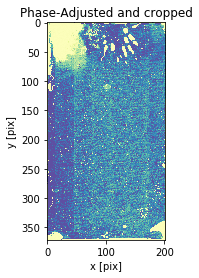

In [3]:
lims = f0167.get_croplims(index=0,thresh=.00005)
adjusted_image,vmin,vmax=f0167.process_image(index=0,crop=True)
fig, ax_main = plt.subplots()
ax_main.imshow(adjusted_image,cmap=cmap,vmin=vmin,vmax=vmax)
ax_main.set_xlabel("x [pix]")
ax_main.set_ylabel("y [pix]")
ax_main.set_title("Phase-Adjusted and cropped")

In [ ]:
f0167.make_video()

Decoding Images: 100%|█████████████████████████████████████████████████████████████| 2221/2221 [06:05<00:00,  6.07it/s]


Saving...


In [4]:
index = 0
rphase_images = f0167.get_data(index=index)

lims = f0167.get_croplims(index=0,thresh=.00005)
cphase_images=f0167.get_crop(index=index)


raw_offset = rphase_images[0]-rphase_images[1]
crop_offset = cphase_images[0]-cphase_images[1]

r_adjusted=[];c_adjusted=[];
r_adjusted.append(rphase_images[0] - raw_offset)
c_adjusted.append(cphase_images[0] - crop_offset)

r_adjusted.append(rphase_images[1] + raw_offset)
c_adjusted.append(cphase_images[1] + crop_offset)

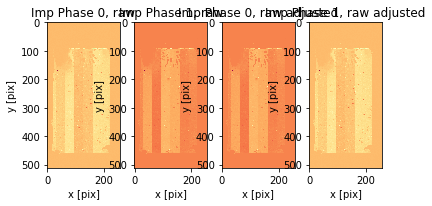

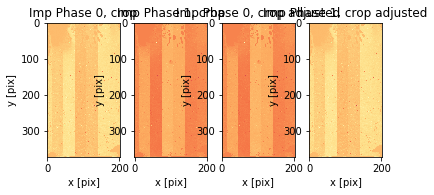

In [4]:
fig, ax_main = plt.subplots(nrows=1,ncols=4)
for i in range(2):
    ax_main[i].imshow(rphase_images[i],cmap=cmap)
    ax_main[i].set_xlabel("x [pix]")
    ax_main[i].set_ylabel("y [pix]")
    ax_main[i].set_title("Imp Phase {}, raw".format(i))
    ax_main[i+2].imshow(r_adjusted[i],cmap=cmap)
    ax_main[i+2].set_xlabel("x [pix]")
    ax_main[i+2].set_ylabel("y [pix]")
    ax_main[i+2].set_title("Imp Phase {}, raw adjusted".format(i))
    
fig, ax_main = plt.subplots(nrows=1,ncols=4)
for i in range(2):
    ax_main[i].imshow(cphase_images[i],cmap=cmap)
    ax_main[i].set_xlabel("x [pix]")
    ax_main[i].set_ylabel("y [pix]")
    ax_main[i].set_title("Imp Phase {}, crop".format(i))
    ax_main[i+2].imshow(c_adjusted[i],cmap=cmap)
    ax_main[i+2].set_xlabel("x [pix]")
    ax_main[i+2].set_ylabel("y [pix]")
    ax_main[i+2].set_title("Imp Phase {}, crop adjusted".format(i))

Text(0.5,1,'Phase-Adjusted and cropped')

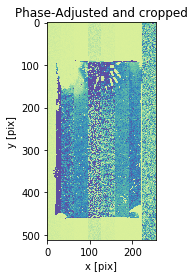

# Testing the image used for determining the crop bounds

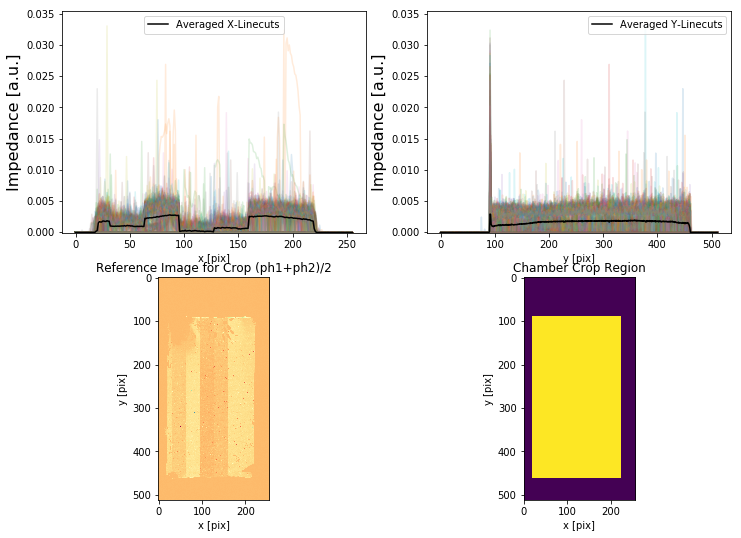

In [28]:
[phase1,phase2]=f0167.Get_Data(index=0)
avphase = (phase1+phase1)/2
av_xlinecut = np.mean(avphase,axis=0)
av_ylinecut = np.mean(avphase,axis=1)

xcrop,ycrop = (av_xlinecut>.00005) , (av_ylinecut>.00005)
xycrop = np.outer(ycrop,xcrop)

fig, axs = plt.subplots(nrows=2,ncols=2)
for i in range(avphase.shape[0]):
    axs[0,0].plot(avphase[i,:],alpha=.15)
for i in range(avphase.shape[1]):
    axs[0,1].plot(avphase[:,i],alpha=.15)
axs[0,0].plot(av_xlinecut,'black',label="Averaged X-Linecuts")
axs[0,0].set_xlabel('x [pix]')
axs[0,0].set_ylim(bottom=-.0001)
axs[0,0].legend()
axs[0,0].set_ylabel('Impedance [a.u.]',fontsize=16)

axs[0,1].plot(av_ylinecut,'black',label="Averaged Y-Linecuts")
axs[0,1].set_xlabel('y [pix]')
axs[0,1].set_ylim(bottom=-.0001)
axs[0,1].legend()
axs[0,1].set_ylabel('Impedance [a.u.]',fontsize=16)


axs[1,0].imshow(avphase,cmap=cmap)
axs[1,0].set_xlabel("x [pix]")
axs[1,0].set_ylabel("y [pix]")
axs[1,0].set_title("Reference Image for Crop (ph1+ph2)/2")

axs[1,1].imshow(xycrop)
axs[1,1].set_xlabel("x [pix]")
axs[1,1].set_ylabel("y [pix]")
axs[1,1].set_title("Chamber Crop Region")
plt.show()

In [4]:
23//32

0